In [2]:
# read data
import pandas as pd
mall_df = pd.read_csv('Mall_customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_test_scaled = scaler.fit_transform(X)

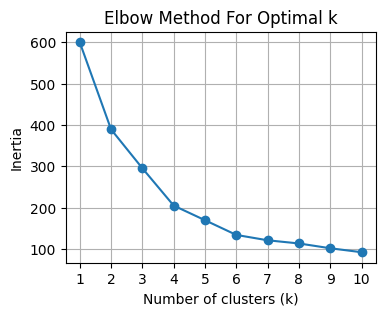

In [9]:
# choosing the optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_test_scaled)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [10]:
#kmeans
from sklearn.cluster import KMeans
mall_cluster_kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
mall_df["cluster"] = mall_cluster_kmeans.fit_predict(X_test_scaled)
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [11]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

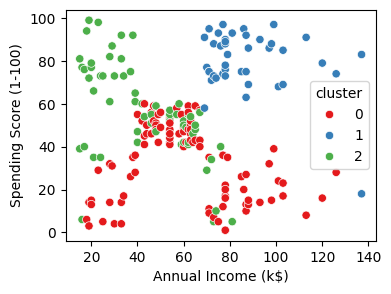

In [12]:
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.scatterplot(data=mall_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set1')

In [14]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_test_scaled, mall_df['cluster'])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.3579234303882264
